## Traveloka Data Challenge

## Problem Statement

Create recommendation and strategy to reduce customer churn

Customer churn = customer who haven’t bought in the last one year from
last_updated_date in the dataset

last_updated_date = ‘2019-02-01’

## Metadata

Profile_id = hashed identity of a customer. One profile id represents one customer [integer 64]

Primary_sales_product = the product identifier [{‘FLIGHT’, ‘HOTEL’, ‘TRAIN’, ‘TRIP’}]

first_booking_time = is the first time the customer booked a product in primary_sales_product
[unix timestamp in milliseconds]

First_issued_time = is the first time the customer issued a product in primary_sales_product
[unix timestamp in milliseconds]

Last_booking_time = is the last time the customer booked a product in primary_sales_product
[unix timestamp in milliseconds]

Last_issued_time = is the first time the customer issued a product in primary_sales_product
[unix timestamp in milliseconds]

Avg_booking_invoice = avg invoice amount in submitted booking [in IDR]

Avg_issued_invoice = avg invoice amount in issuance [in IDR]

Count_booking = total count of bookings of that particular product (from the day they were
acquired until now) [integer]

Count_issued = total count of issuance of that particular product (from the day they were
acquired until now) [integer]

### Data Analysis

In [174]:
import pandas as pd
from datetime import datetime
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [175]:
data = pd.read_csv('dsda_case_study_2019.csv')

In [176]:
data.head(5)

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number
0,3632279,HOTEL,1436705255370,1.466T,1538717915528,1.539T,2.001M,1.193M,32,18,1.562m
1,3632279,FLIGHT,1405686647701,1.406T,1545735395212,1.546T,1.174M,1.032M,58,33,1.562m
2,17407638,TRAIN,1493348364000,1.493T,1548320804000,1.548T,284.884k,252.776k,62,24,4.267m
3,17407638,HOTEL,1493361893998,1.493T,1547642393838,1.548T,737.447k,587.506k,36,22,4.267m
4,4618047,FLIGHT,1420511473189,1.429T,1546763512498,1.543T,1.605M,1.443M,53,20,2.460m


In [177]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [178]:
display_all(data.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
profile_id,279.149k,NaN,NaN,NaN,23.003M,23.419M,80.027k,7.836M,15.003M,23.614M,104.084M
primary_sales_product_type,279149,4,FLIGHT,136661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_booking_time,279.149k,NaN,NaN,NaN,1.494T,37.141G,1.363T,1.471T,1.500T,1.522T,1.549T
first_issued_time,206.554k,NaN,NaN,NaN,1.495T,35.637G,1.364T,1.473T,1.501T,1.523T,1.549T
last_booking_time,279.149k,NaN,NaN,NaN,1.516T,31.606G,1.363T,1.499T,1.525T,1.541T,1.549T
last_issued_time,206.554k,NaN,NaN,NaN,1.518T,29.183G,1.366T,1.501T,1.526T,1.542T,1.549T
avg_booking_invoice_amount_idr,279.149k,NaN,NaN,NaN,1.233M,3.246M,-827.572k,412.143k,770.905k,1.378M,794.092M
avg_issued_invoice_amount_idr,206.554k,NaN,NaN,NaN,1.118M,1.485M,0.000,408.061k,753.152k,1.310M,88.993M
count_booking,279.149k,NaN,NaN,NaN,10.835,28.831,1.000,1.000,3.000,10.000,4.308k
count_issued,279.149k,NaN,NaN,NaN,5.165,17.741,0.000,0.000,1.000,4.000,3.132k


#### From the above table we can infer the following at a high level:

    1. The number of records for first_issued_time , last_issued_time & 
       avg_issued_invoice_amount_idr are 206554. There are null values in these columns.
    2. avg_booking_invoice_amount_idr minimim value is negative. This may be a system error.
    3. random_number column may not be useful for our analysis, so can be removed for this study.
    

#### Dropping random_number column

In [179]:
data_cleaned = data.drop('random_number',axis=1)

#### Checking for NULL values

In [180]:
display_all(data_cleaned.isnull().sum().sort_index()/len(data)*100)

avg_booking_invoice_amount_idr     0.000
avg_issued_invoice_amount_idr     26.006
count_booking                      0.000
count_issued                       0.000
first_booking_time                 0.000
first_issued_time                 26.006
last_booking_time                  0.000
last_issued_time                  26.006
primary_sales_product_type         0.000
profile_id                         0.000
dtype: float64

From the above table it is clear that variables **avg_issued_invoice_amount_idr, first_issued_time,last_issued_time** are having **26.005825%** records as NULL values. We can eliminate them from our analysis for accuracy reasons.

In [181]:
data_cleaned = data_cleaned[pd.notnull(data['avg_issued_invoice_amount_idr'])]

#### Checking for Null values records

In [182]:
display_all(data_cleaned.isnull().sum().sort_index()/len(data)*100)

avg_booking_invoice_amount_idr    0.000
avg_issued_invoice_amount_idr     0.000
count_booking                     0.000
count_issued                      0.000
first_booking_time                0.000
first_issued_time                 0.000
last_booking_time                 0.000
last_issued_time                  0.000
primary_sales_product_type        0.000
profile_id                        0.000
dtype: float64

#### Converting unix timestamp to Date

In [183]:
#Converting the timestamp to UTC timestamp for reducing ambiguity
data_cleaned['first_booking_time_cleaned']=(pd.to_datetime(data_cleaned['first_booking_time'],unit='ms')) 
data_cleaned['first_issued_time_cleaned']=(pd.to_datetime(data_cleaned['first_issued_time'],unit='ms')) 
data_cleaned['last_booking_time_cleaned']=(pd.to_datetime(data_cleaned['last_booking_time'],unit='ms')) 
data_cleaned['last_issued_time_cleaned']=(pd.to_datetime(data_cleaned['last_issued_time'],unit='ms')) 
data_cleaned = data_cleaned.drop(['first_booking_time','first_issued_time','last_booking_time','last_issued_time'],axis=1)

#### Deriving New columns

In [184]:
data_cleaned["year"] = pd.DatetimeIndex(data_cleaned["last_issued_time_cleaned"]).year
data_cleaned["month"] = pd.DatetimeIndex(data_cleaned["last_issued_time_cleaned"]).month
data_cleaned["day"] = pd.DatetimeIndex(data_cleaned["last_issued_time_cleaned"]).day
data_cleaned["quarter"] = pd.DatetimeIndex(data_cleaned["last_issued_time_cleaned"]).quarter
data_cleaned["year_month"] = data_cleaned['last_issued_time_cleaned'].map(lambda x: 1000*x.year + x.month)
data_cleaned["year_quarter"] = pd.DatetimeIndex(data_cleaned["last_issued_time_cleaned"]).map(lambda x: 1000*x.year + x.quarter)

#### Deriving the Active days

The number of Active days is derived by the difference of **Last Issue date** minus the **First Issue date**

In [185]:
data_cleaned['active_days'] = (data_cleaned['last_issued_time_cleaned'] - data_cleaned['first_issued_time_cleaned']).dt.days

In [186]:
data_cleaned.head(5)

,profile_id,primary_sales_product_type,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,first_booking_time_cleaned,first_issued_time_cleaned,last_booking_time_cleaned,last_issued_time_cleaned,year,month,day,quarter,year_month,year_quarter,active_days
0,3632279,HOTEL,2.001M,1.193M,32,18,2015-07-12 12:47:35.370,2016-06-19 02:44:34.396,2018-10-05 05:38:35.528,2018-10-05 05:48:02.608,2018,10,5,4,2018010,2018004,838
1,3632279,FLIGHT,1.174M,1.032M,58,33,2014-07-18 12:30:47.701,2014-07-23 01:02:11.494,2018-12-25 10:56:35.212,2018-12-25 11:02:41.270,2018,12,25,4,2018012,2018004,1616
2,17407638,TRAIN,284.884k,252.776k,62,24,2017-04-28 02:59:24.000,2017-04-28 03:12:27.000,2019-01-24 09:06:44.000,2019-01-24 09:40:02.000,2019,1,24,1,2019001,2019001,636
3,17407638,HOTEL,737.447k,587.506k,36,22,2017-04-28 06:44:53.998,2017-04-28 06:52:52.547,2019-01-16 12:39:53.838,2019-01-16 13:00:03.911,2019,1,16,1,2019001,2019001,628
4,4618047,FLIGHT,1.605M,1.443M,53,20,2015-01-06 02:31:13.189,2015-04-16 10:01:38.531,2019-01-06 08:31:52.498,2018-11-22 12:53:41.530,2018,11,22,4,2018011,2018004,1316


#### Customer Count by Product

In [187]:
customer_product = data_cleaned[['primary_sales_product_type','profile_id']].drop_duplicates()
customer_product.groupby(['primary_sales_product_type'])['profile_id'].aggregate('count').reset_index().sort_values('profile_id', ascending=False)

,primary_sales_product_type,profile_id
0,FLIGHT,103624
1,HOTEL,66028
2,TRAIN,32601
3,TRIP,3754


 Based on the above table it is clear that more than **50%** of the customers book flight tickets followed by hotel, train and trip.

#### Most Spend by Product

Total Invoice Amount -> 230941939085.2025
 
  primary_sales_product_type  avg_issued_invoice_amount_idr
0                     FLIGHT                       152.550G
1                      HOTEL                        53.609G
3                       TRIP                        13.880G
2                      TRAIN                        10.902G


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

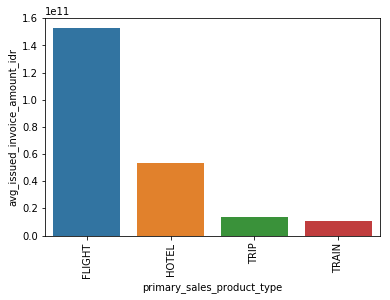

In [188]:
np.set_printoptions(suppress=False)
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)
print('Total Invoice Amount ->',data_cleaned['avg_issued_invoice_amount_idr'].sum())
print(' ')
groupbyprofile = data_cleaned.groupby(['primary_sales_product_type'],sort=True)['avg_issued_invoice_amount_idr'].sum().reset_index()
print(groupbyprofile.sort_values('avg_issued_invoice_amount_idr',ascending=False).head(5))
sns.barplot(x = 'primary_sales_product_type',y='avg_issued_invoice_amount_idr',data=groupbyprofile.sort_values('avg_issued_invoice_amount_idr',ascending=False).head(20))
plt.xticks(Rotation= 'vertical')

From the above graph it is clear that majority of Traveloka's customers are using the website predominantly for Flight booking.

#### Deriving Total Cancellations / Payment Failures

The difference between the count of issued and count of booking would give us count of Cancellations and Payment failures.

In [189]:
data_cleaned['count_cancellation'] = data_cleaned['count_booking'] - data_cleaned['count_issued']

#### Total Monthly Boooking / Issue / Cancellation

In [190]:
print(data_cleaned['count_booking'].sum())
print(data_cleaned['count_issued'].sum())
print(data_cleaned['count_cancellation'].sum())

2860204
1441873
1418331


#### Quarterly FLIGHTS Bookings/ Issues and Cancellations

In [191]:
data_cleaned_flight = data_cleaned.loc[data['primary_sales_product_type']=='FLIGHT']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

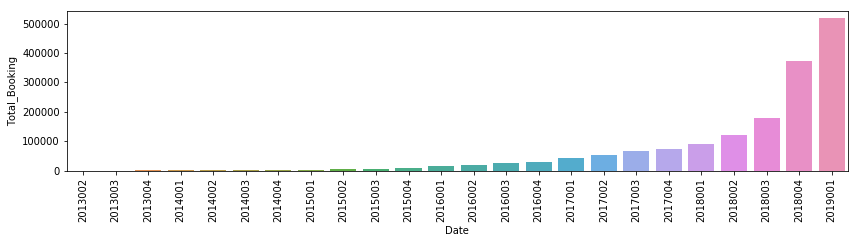

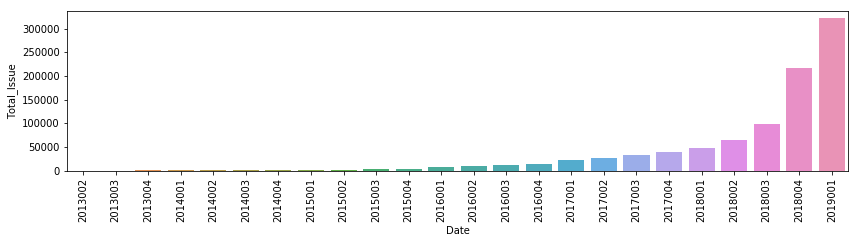

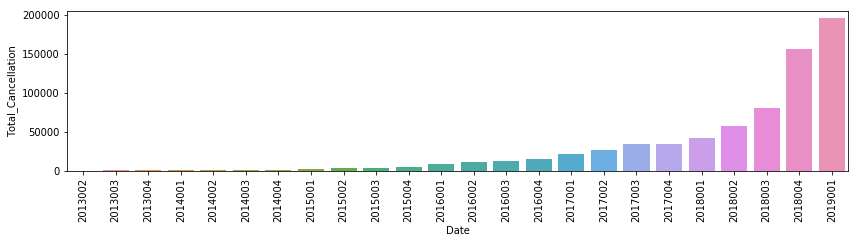

In [192]:
bookinggroupbymonth = data_cleaned_flight.groupby(['year_quarter'],sort=True)['count_booking'].sum().reset_index()
bookinggroupbymonth.columns = ["Date","Total_Booking"]

issuegroupbymonth = data_cleaned_flight.groupby(['year_quarter'],sort=True)['count_issued'].sum().reset_index()
issuegroupbymonth.columns = ["Date","Total_Issue"]

cancelgroupbymonth = data_cleaned_flight.groupby(['year_quarter'],sort=True)['count_cancellation'].sum().reset_index()
cancelgroupbymonth.columns = ["Date","Total_Cancellation"]

plt.figure(figsize=(14,10))
plt.subplot(311)
sns.barplot(data=bookinggroupbymonth, x="Date", y="Total_Booking")
plt.xticks(Rotation= 'vertical')

plt.figure(figsize=(14,10))
plt.subplot(312)
sns.barplot(data=issuegroupbymonth, x="Date", y="Total_Issue")
plt.xticks(Rotation= 'vertical')

plt.figure(figsize=(14,10))
plt.subplot(313)
sns.barplot(data=cancelgroupbymonth, x="Date", y="Total_Cancellation")
plt.xticks(Rotation= 'vertical')

#### Quarterly HOTEL Bookings/ Issues and Cancellations

In [193]:
data_cleaned_hotel = data_cleaned.loc[data['primary_sales_product_type']=='HOTEL']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

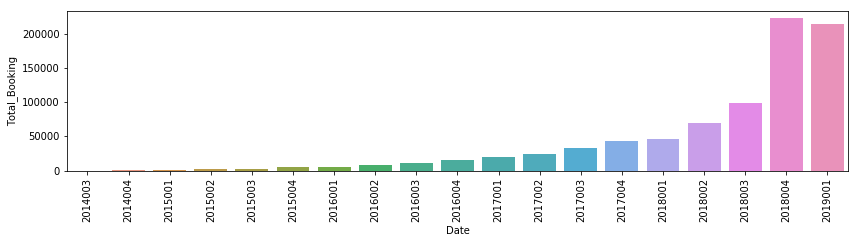

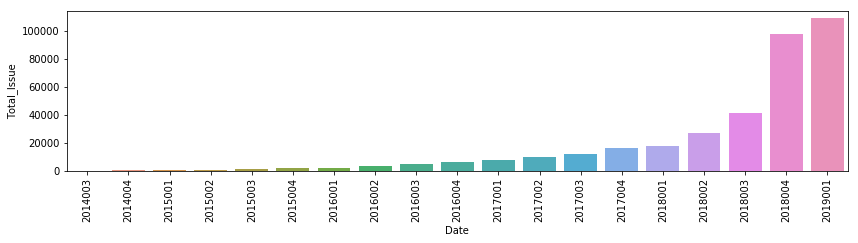

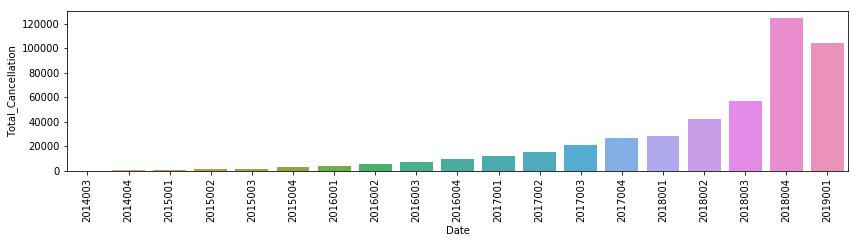

In [194]:
bookinggroupbymonth = data_cleaned_hotel.groupby(['year_quarter'],sort=True)['count_booking'].sum().reset_index()
bookinggroupbymonth.columns = ["Date","Total_Booking"]

issuegroupbymonth = data_cleaned_hotel.groupby(['year_quarter'],sort=True)['count_issued'].sum().reset_index()
issuegroupbymonth.columns = ["Date","Total_Issue"]

cancelgroupbymonth = data_cleaned_hotel.groupby(['year_quarter'],sort=True)['count_cancellation'].sum().reset_index()
cancelgroupbymonth.columns = ["Date","Total_Cancellation"]

plt.figure(figsize=(14,10))
plt.subplot(311)
sns.barplot(data=bookinggroupbymonth, x="Date", y="Total_Booking")
plt.xticks(Rotation= 'vertical')

plt.figure(figsize=(14,10))
plt.subplot(312)
sns.barplot(data=issuegroupbymonth, x="Date", y="Total_Issue")
plt.xticks(Rotation= 'vertical')

plt.figure(figsize=(14,10))
plt.subplot(313)
sns.barplot(data=cancelgroupbymonth, x="Date", y="Total_Cancellation")
plt.xticks(Rotation= 'vertical')

#### Quarterly TRIP Bookings/ Issues and Cancellations

In [195]:
data_cleaned_trip = data_cleaned.loc[data['primary_sales_product_type']=='TRIP']

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

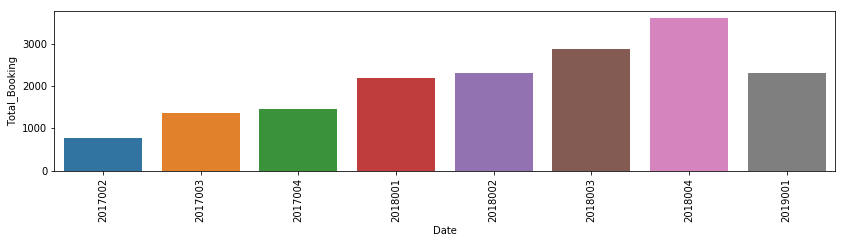

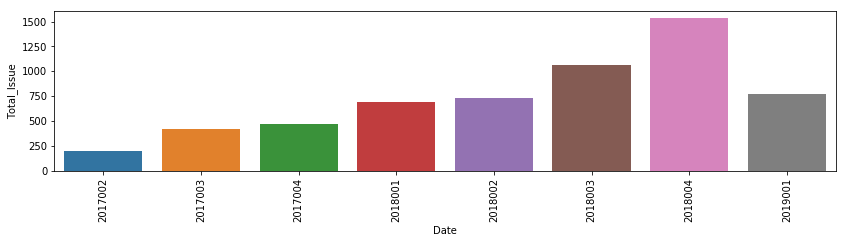

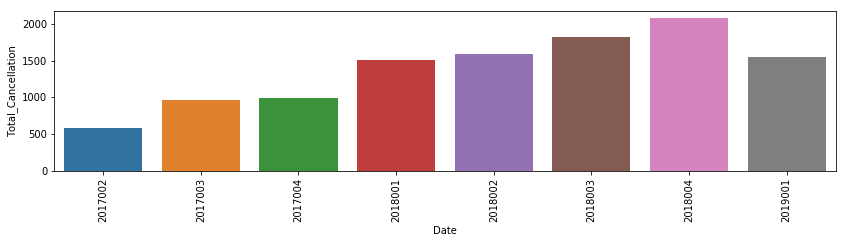

In [196]:
bookinggroupbymonth = data_cleaned_trip.groupby(['year_quarter'],sort=True)['count_booking'].sum().reset_index()
bookinggroupbymonth.columns = ["Date","Total_Booking"]

issuegroupbymonth = data_cleaned_trip.groupby(['year_quarter'],sort=True)['count_issued'].sum().reset_index()
issuegroupbymonth.columns = ["Date","Total_Issue"]

cancelgroupbymonth = data_cleaned_trip.groupby(['year_quarter'],sort=True)['count_cancellation'].sum().reset_index()
cancelgroupbymonth.columns = ["Date","Total_Cancellation"]

plt.figure(figsize=(14,10))
plt.subplot(311)
sns.barplot(data=bookinggroupbymonth, x="Date", y="Total_Booking")
plt.xticks(Rotation= 'vertical')

plt.figure(figsize=(14,10))
plt.subplot(312)
sns.barplot(data=issuegroupbymonth, x="Date", y="Total_Issue")
plt.xticks(Rotation= 'vertical')

plt.figure(figsize=(14,10))
plt.subplot(313)
sns.barplot(data=cancelgroupbymonth, x="Date", y="Total_Cancellation")
plt.xticks(Rotation= 'vertical')

#### Total Quarterly TRAIN Booking / Issue/ Cancellation

In [197]:
data_cleaned_train = data_cleaned.loc[data['primary_sales_product_type']=='TRAIN']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

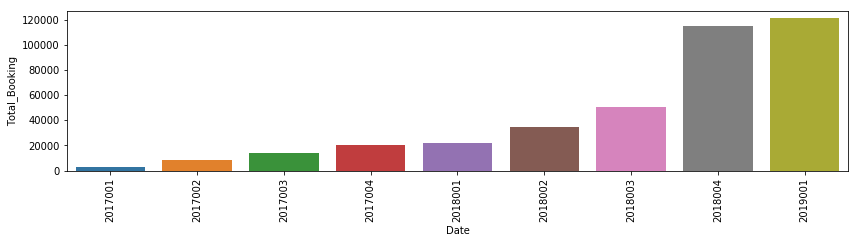

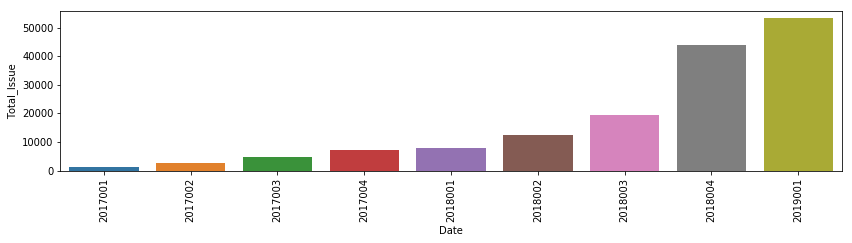

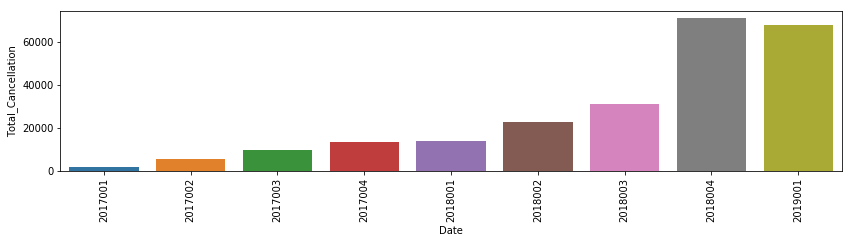

In [198]:
bookinggroupbyyear = data_cleaned_train.groupby(['year_quarter'],sort=True)['count_booking'].sum().reset_index()
bookinggroupbyyear.columns = ["Date","Total_Booking"]

issuegroupbyyear = data_cleaned_train.groupby(['year_quarter'],sort=True)['count_issued'].sum().reset_index()
issuegroupbyyear.columns = ["Date","Total_Issue"]

cancelgroupbyyear = data_cleaned_train.groupby(['year_quarter'],sort=True)['count_cancellation'].sum().reset_index()
cancelgroupbyyear.columns = ["Date","Total_Cancellation"]

plt.figure(figsize=(14,10))
plt.subplot(311)
sns.barplot(data=bookinggroupbyyear, x="Date", y="Total_Booking")
plt.xticks(Rotation= 'vertical')

plt.figure(figsize=(14,10))
plt.subplot(312)
sns.barplot(data=issuegroupbyyear, x="Date", y="Total_Issue")
plt.xticks(Rotation= 'vertical')

plt.figure(figsize=(14,10))
plt.subplot(313)
sns.barplot(data=cancelgroupbyyear, x="Date", y="Total_Cancellation")
plt.xticks(Rotation= 'vertical')

#### Quarterly FLIGHTS Total Issue / Booking Amount 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

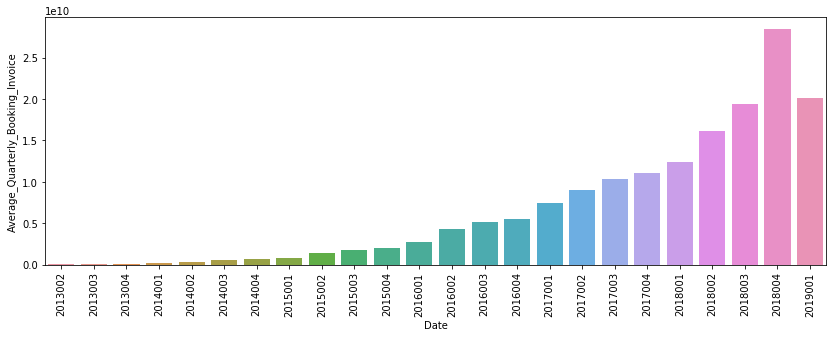

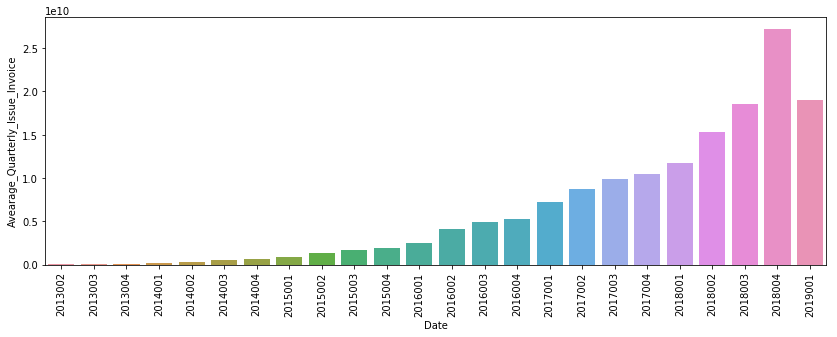

In [199]:
bookinggroupbyyear = data_cleaned_flight.groupby(['year_quarter'],sort=True)['avg_booking_invoice_amount_idr'].sum().reset_index()
bookinggroupbyyear.columns = ["Date","Average_Quarterly_Booking_Invoice"]

issuegroupbyyear = data_cleaned_flight.groupby(['year_quarter'],sort=True)['avg_issued_invoice_amount_idr'].sum().reset_index()
issuegroupbyyear.columns = ["Date","Avearage_Quarterly_Issue_Invoice"]

plt.figure(figsize=(14,10))
plt.subplot(211)
sns.barplot(data=bookinggroupbyyear, x="Date", y="Average_Quarterly_Booking_Invoice")
plt.xticks(Rotation= 'vertical')

plt.figure(figsize=(14,10))
plt.subplot(212)
sns.barplot(data=issuegroupbyyear, x="Date", y="Avearage_Quarterly_Issue_Invoice")
plt.xticks(Rotation= 'vertical')


#### Quarterly HOTELS Total Issue / Booking Amount 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

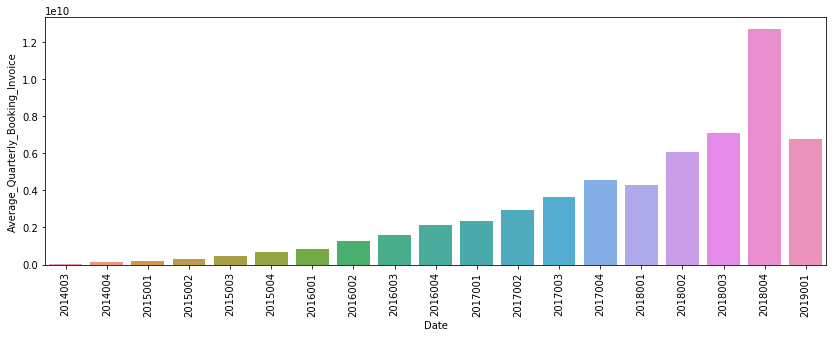

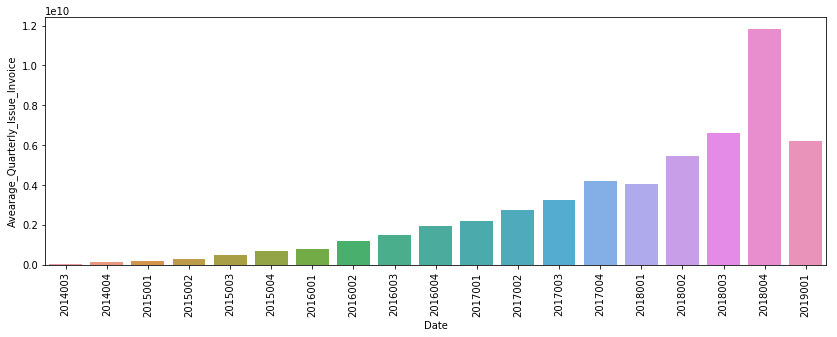

In [200]:
bookinggroupbyyear = data_cleaned_hotel.groupby(['year_quarter'],sort=True)['avg_booking_invoice_amount_idr'].sum().reset_index()
bookinggroupbyyear.columns = ["Date","Average_Quarterly_Booking_Invoice"]

issuegroupbyyear = data_cleaned_hotel.groupby(['year_quarter'],sort=True)['avg_issued_invoice_amount_idr'].sum().reset_index()
issuegroupbyyear.columns = ["Date","Avearage_Quarterly_Issue_Invoice"]

plt.figure(figsize=(14,10))
plt.subplot(211)
sns.barplot(data=bookinggroupbyyear, x="Date", y="Average_Quarterly_Booking_Invoice")
plt.xticks(Rotation= 'vertical')

plt.figure(figsize=(14,10))
plt.subplot(212)
sns.barplot(data=issuegroupbyyear, x="Date", y="Avearage_Quarterly_Issue_Invoice")
plt.xticks(Rotation= 'vertical')


#### Quarterly TRAIN Total Issue / Booking Amount 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

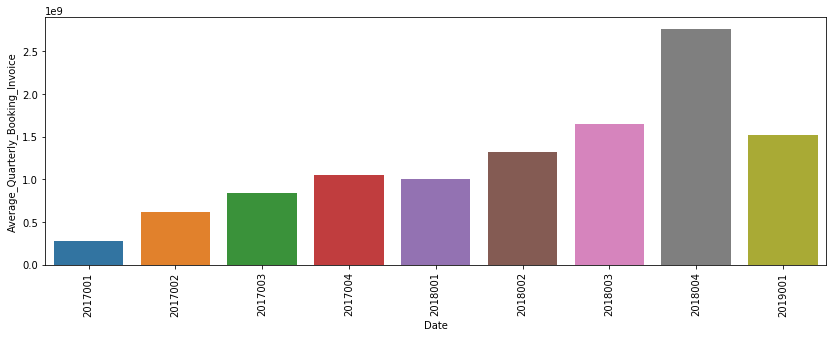

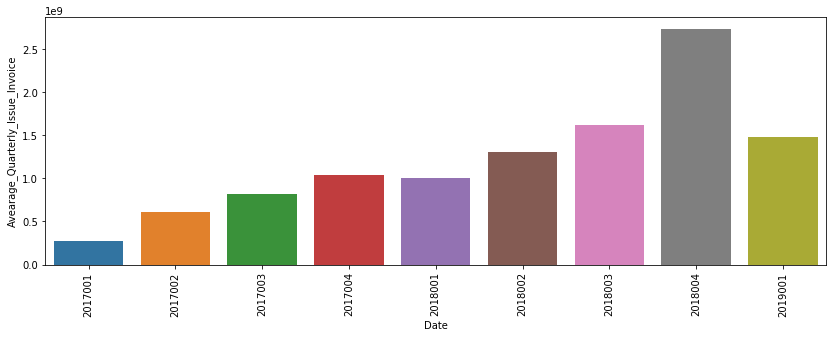

In [201]:
bookinggroupbyyear = data_cleaned_train.groupby(['year_quarter'],sort=True)['avg_booking_invoice_amount_idr'].sum().reset_index()
bookinggroupbyyear.columns = ["Date","Average_Quarterly_Booking_Invoice"]

issuegroupbyyear = data_cleaned_train.groupby(['year_quarter'],sort=True)['avg_issued_invoice_amount_idr'].sum().reset_index()
issuegroupbyyear.columns = ["Date","Avearage_Quarterly_Issue_Invoice"]

plt.figure(figsize=(14,10))
plt.subplot(211)
sns.barplot(data=bookinggroupbyyear, x="Date", y="Average_Quarterly_Booking_Invoice")
plt.xticks(Rotation= 'vertical')

plt.figure(figsize=(14,10))
plt.subplot(212)
sns.barplot(data=issuegroupbyyear, x="Date", y="Avearage_Quarterly_Issue_Invoice")
plt.xticks(Rotation= 'vertical')


#### Quarterly TRIPS Total Issue / Booking Amount 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

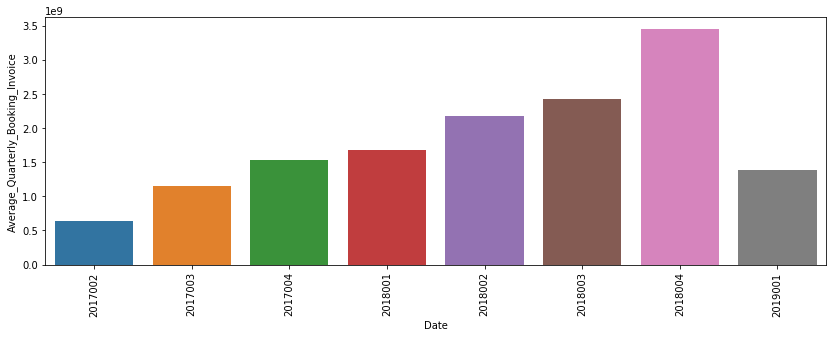

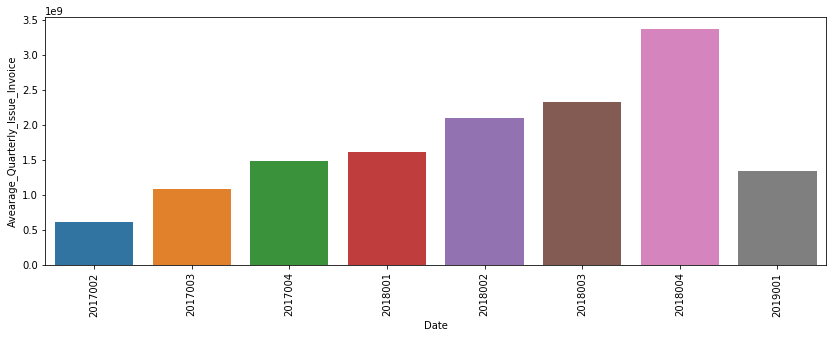

In [202]:
bookinggroupbyyear = data_cleaned_trip.groupby(['year_quarter'],sort=True)['avg_booking_invoice_amount_idr'].sum().reset_index()
bookinggroupbyyear.columns = ["Date","Average_Quarterly_Booking_Invoice"]

issuegroupbyyear = data_cleaned_trip.groupby(['year_quarter'],sort=True)['avg_issued_invoice_amount_idr'].sum().reset_index()
issuegroupbyyear.columns = ["Date","Avearage_Quarterly_Issue_Invoice"]

plt.figure(figsize=(14,10))
plt.subplot(211)
sns.barplot(data=bookinggroupbyyear, x="Date", y="Average_Quarterly_Booking_Invoice")
plt.xticks(Rotation= 'vertical')

plt.figure(figsize=(14,10))
plt.subplot(212)
sns.barplot(data=issuegroupbyyear, x="Date", y="Avearage_Quarterly_Issue_Invoice")
plt.xticks(Rotation= 'vertical')


From the above two plots it is clear that data has most of the booking/ issue invoice has happened during the last 6 months of the data set starting  

#### Quarterly FLIGHTS Users Across Years

In [203]:
display_all(data_cleaned_trip.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
profile_id,3.769k,NaN,NaN,NaN,NaN,NaN,17.010M,18.925M,80.027k,5.633M,11.061M,19.221M,103.798M
primary_sales_product_type,3769,1,TRIP,3769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_booking_invoice_amount_idr,3.769k,NaN,NaN,NaN,NaN,NaN,3.824M,3.831M,0.000,1.882M,2.804M,4.504M,79.366M
avg_issued_invoice_amount_idr,3.769k,NaN,NaN,NaN,NaN,NaN,3.683M,3.728M,0.000,1.802M,2.659M,4.326M,79.366M
count_booking,3.769k,NaN,NaN,NaN,NaN,NaN,4.504,8.753,1.000,1.000,2.000,5.000,279.000
count_issued,3.769k,NaN,NaN,NaN,NaN,NaN,1.560,1.602,1.000,1.000,1.000,2.000,31.000
first_booking_time_cleaned,3769,3754,2019-01-28 08:56:58,2,2017-05-03 10:31:42.804000,2019-02-01 08:57:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_issued_time_cleaned,3769,3754,2019-01-30 13:34:15,2,2017-05-03 10:42:22.883000,2019-02-01 15:23:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_booking_time_cleaned,3769,3754,2018-10-26 10:06:20,2,2017-05-03 13:06:05.924000,2019-02-01 22:52:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_issued_time_cleaned,3769,3754,2018-03-22 04:16:32,2,2017-05-03 10:42:22.883000,2019-02-01 17:13:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

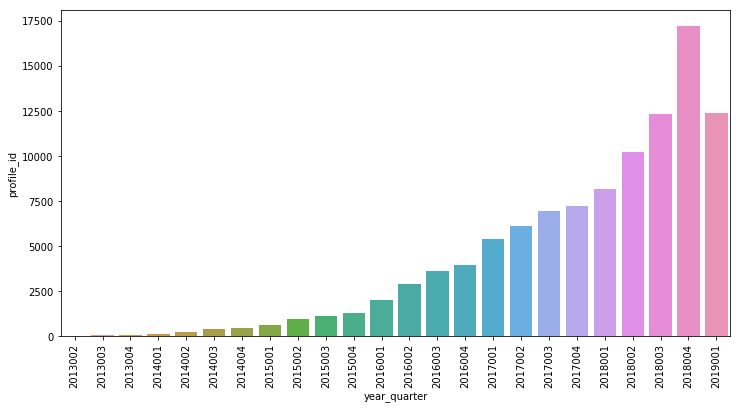

In [204]:
groupbyprofilecount = data_cleaned_flight.groupby(['year_quarter'])['profile_id'].count().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data= groupbyprofilecount,x="year_quarter",y="profile_id")
plt.xticks(Rotation= 'vertical')

#### Quarterly TRIPS Users Across Years

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

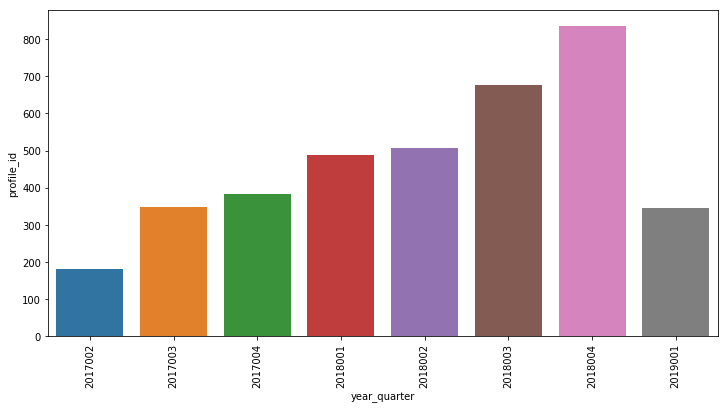

In [205]:
groupbyprofilecount = data_cleaned_trip.groupby(['year_quarter'])['profile_id'].count().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data= groupbyprofilecount,x="year_quarter",y="profile_id")
plt.xticks(Rotation= 'vertical')

#### Quarterly TRAIN Users Across Years

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

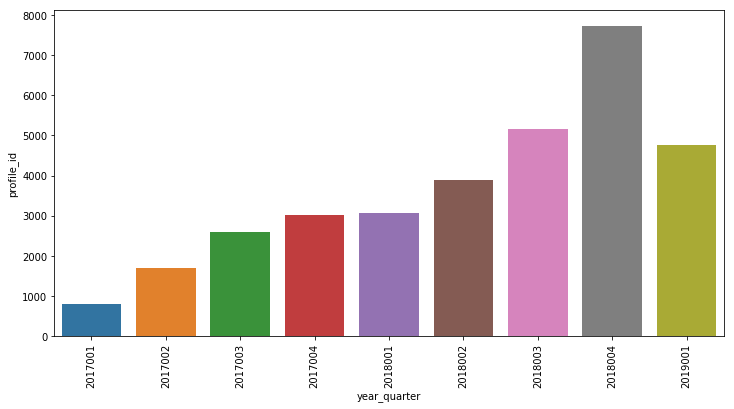

In [206]:
groupbyprofilecount = data_cleaned_train.groupby(['year_quarter'])['profile_id'].count().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data= groupbyprofilecount,x="year_quarter",y="profile_id")
plt.xticks(Rotation= 'vertical')

#### Quarterly HOTELS Users Across Years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

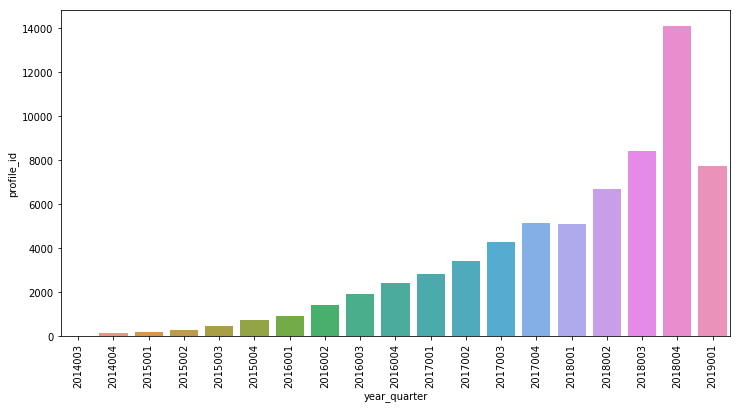

In [207]:
groupbyprofilecount = data_cleaned_hotel.groupby(['year_quarter'])['profile_id'].count().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data= groupbyprofilecount,x="year_quarter",y="profile_id")
plt.xticks(Rotation= 'vertical')

#### Quarterly FLIGHTS Average Users Active Days 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

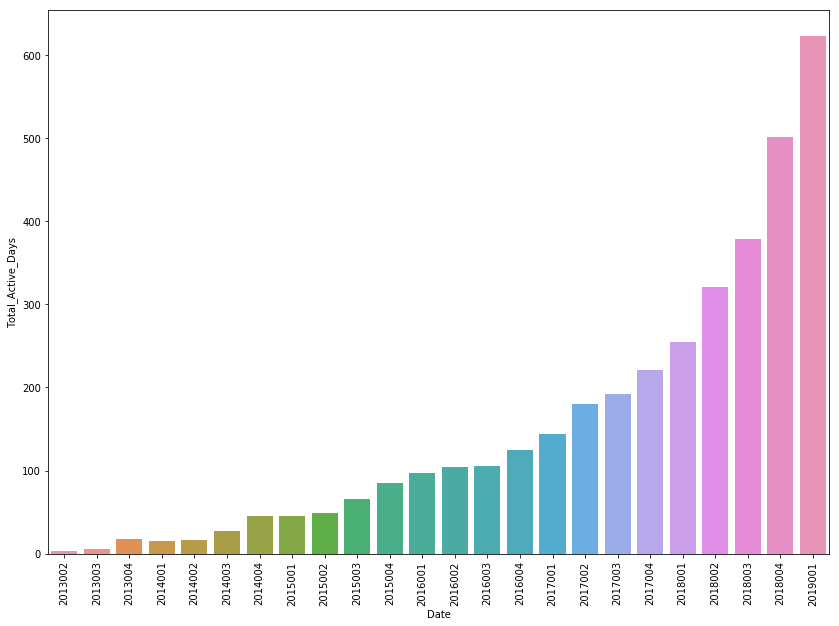

In [208]:
activegroupbyquarter = data_cleaned_flight.groupby(['year_quarter'],sort=True)['active_days'].mean().reset_index()
activegroupbyquarter.columns = ["Date","Total_Active_Days"]

plt.figure(figsize=(14,10))
sns.barplot(data=activegroupbyquarter, x="Date", y="Total_Active_Days")
plt.xticks(Rotation= 'vertical')

#### Quarterly HOTEL Users Average Active Days 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

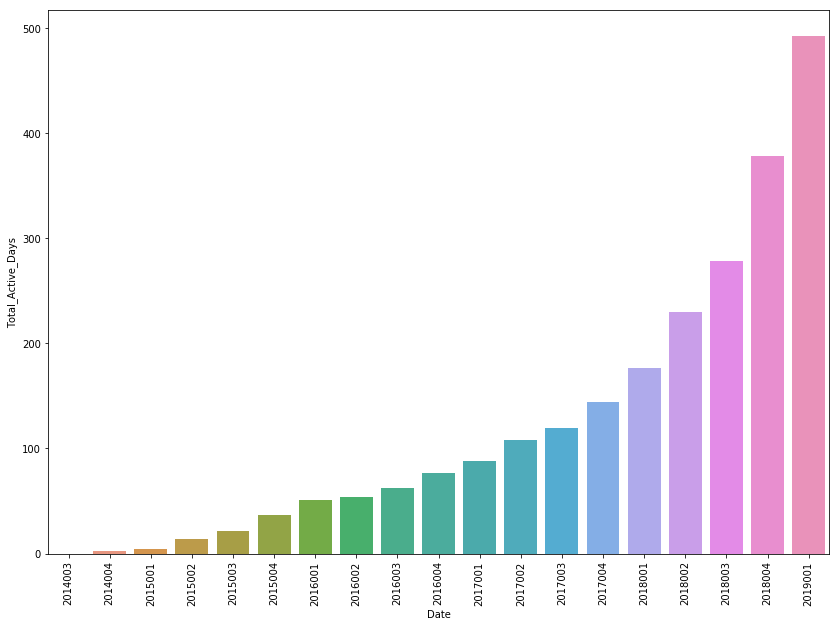

In [209]:
activegroupbyquarter = data_cleaned_hotel.groupby(['year_quarter'],sort=True)['active_days'].mean().reset_index()
activegroupbyquarter.columns = ["Date","Total_Active_Days"]

plt.figure(figsize=(14,10))
sns.barplot(data=activegroupbyquarter, x="Date", y="Total_Active_Days")
plt.xticks(Rotation= 'vertical')

#### Quarterly TRIPS Users  Average Active Days 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

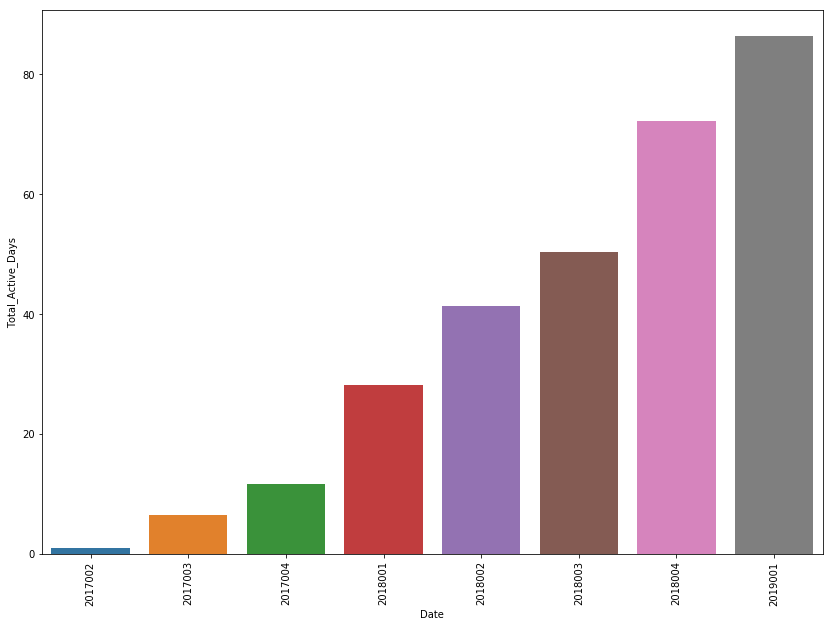

In [210]:
activegroupbyquarter = data_cleaned_trip.groupby(['year_quarter'],sort=True)['active_days'].mean().reset_index()
activegroupbyquarter.columns = ["Date","Total_Active_Days"]

plt.figure(figsize=(14,10))
sns.barplot(data=activegroupbyquarter, x="Date", y="Total_Active_Days")
plt.xticks(Rotation= 'vertical')

#### Quarterly TRAIN Users Average Active Days 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

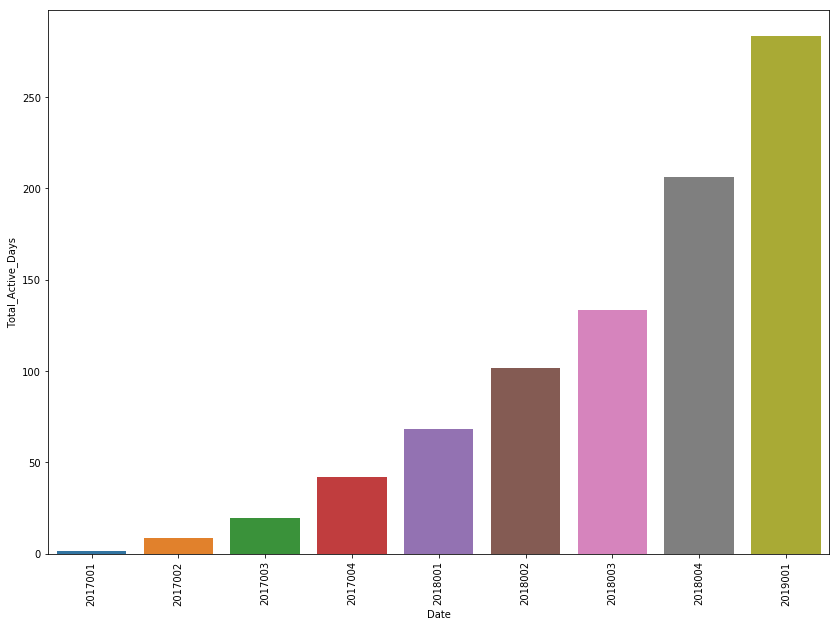

In [211]:
activegroupbyquarter = data_cleaned_train.groupby(['year_quarter'],sort=True)['active_days'].mean().reset_index()
activegroupbyquarter.columns = ["Date","Total_Active_Days"]

plt.figure(figsize=(14,10))
sns.barplot(data=activegroupbyquarter, x="Date", y="Total_Active_Days")
plt.xticks(Rotation= 'vertical')

#### Calculate Churn variable

In [212]:
data_cleaned["Date_From_Last_Updated"]=[int(i.days) for i in (pd.Timestamp("2019-02-01") - data_cleaned['last_issued_time_cleaned'])]

In [213]:
data_cleaned['Churn_Flag'] = np.where(data_cleaned['Date_From_Last_Updated']>365,1,0)

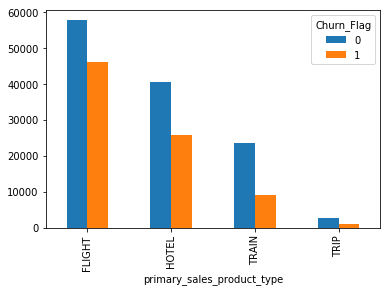

In [214]:
data_cleaned.groupby('primary_sales_product_type').Churn_Flag.value_counts().unstack().plot.bar()

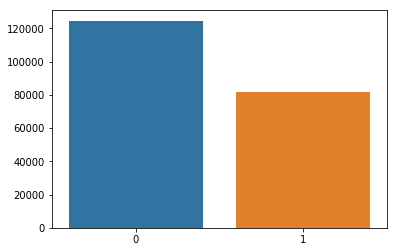

In [215]:
y = data_cleaned["Churn_Flag"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [216]:
y_True = data_cleaned["Churn_Flag"][data_cleaned["Churn_Flag"] == 1]
print ("Churn Percentage = "+str( (y_True.shape[0] / data_cleaned["Churn_Flag"].shape[0]) * 100 ))

Churn Percentage = 39.68066462038983


In [217]:
data_cleaned['diff_first_last_booking'] = (data_cleaned['last_booking_time_cleaned'] - data_cleaned['first_booking_time_cleaned']).dt.days

In [218]:
data_cleaned.groupby(['primary_sales_product_type'])['diff_first_last_booking'].aggregate('median').reset_index().sort_values('diff_first_last_booking', ascending=False)

,primary_sales_product_type,diff_first_last_booking
0,FLIGHT,213
1,HOTEL,180
2,TRAIN,69
3,TRIP,0


In [219]:
data_cleaned['frequency_of_issue'] = data_cleaned['active_days'] / data_cleaned['count_issued']

In [220]:
data_cleaned.groupby(['primary_sales_product_type'])['frequency_of_issue'].aggregate('median').reset_index().sort_values('frequency_of_issue', ascending=False)

,primary_sales_product_type,frequency_of_issue
0,FLIGHT,17.461
1,HOTEL,12.545
2,TRAIN,3.333
3,TRIP,0.000


In [221]:
data_cleaned['frequency_of_booking'] = data_cleaned['active_days'] / data_cleaned['count_booking']

In [222]:
data_cleaned.groupby(['primary_sales_product_type'])['frequency_of_booking'].aggregate('median').reset_index().sort_values('frequency_of_booking', ascending=False)

,primary_sales_product_type,frequency_of_booking
0,FLIGHT,9.837
1,HOTEL,5.446
2,TRAIN,1.400
3,TRIP,0.000


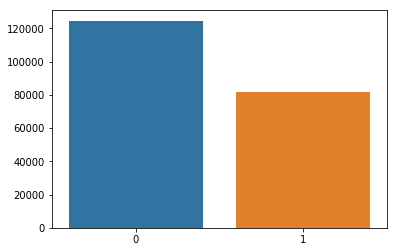

In [223]:
y = data_cleaned["Churn_Flag"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

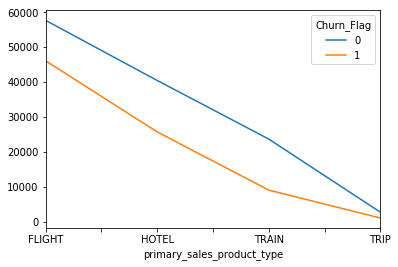

In [224]:
data_cleaned.groupby('primary_sales_product_type').Churn_Flag.value_counts().unstack().plot.line()

In [225]:
data_cleaned['Most_Likely_Churn'] = np.where(data_cleaned['Date_From_Last_Updated']>270,1,0)

In [226]:
data_cleaned['Moderate_Likely_Churn'] = np.where(data_cleaned['Date_From_Last_Updated']>180,1,0)

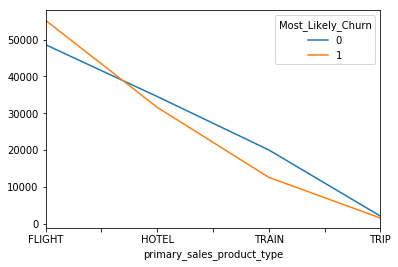

In [227]:
data_cleaned.groupby('primary_sales_product_type').Most_Likely_Churn.value_counts().unstack().plot.line()

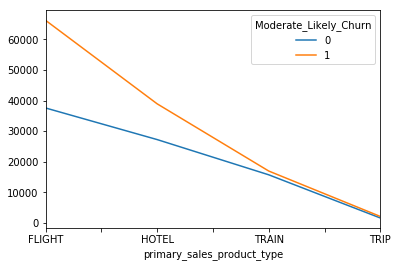

In [228]:
data_cleaned.groupby('primary_sales_product_type').Moderate_Likely_Churn.value_counts().unstack().plot.line()

#### One-hot Encoding the Categoical Product Type variable

In [229]:
list(data_cleaned)

['profile_id',
 'primary_sales_product_type',
 'avg_booking_invoice_amount_idr',
 'avg_issued_invoice_amount_idr',
 'count_booking',
 'count_issued',
 'first_booking_time_cleaned',
 'first_issued_time_cleaned',
 'last_booking_time_cleaned',
 'last_issued_time_cleaned',
 'year',
 'month',
 'day',
 'quarter',
 'year_month',
 'year_quarter',
 'active_days',
 'count_cancellation',
 'Date_From_Last_Updated',
 'Churn_Flag',
 'diff_first_last_booking',
 'frequency_of_issue',
 'frequency_of_booking',
 'Most_Likely_Churn',
 'Moderate_Likely_Churn']

#### Quarterly avarage count and no of active days per quarter count

In [230]:
account_start_date = data_cleaned.groupby(["profile_id","year_quarter"])['avg_issued_invoice_amount_idr'].sum().reset_index()
account_start_date.columns = ["profile_id","year_quarter","avg_transaction"]
account_start_date= pd.pivot_table(data=account_start_date,index=account_start_date.profile_id,columns=account_start_date.year_quarter,
                                  values='avg_transaction',aggfunc='mean' )
account_start_date.fillna(0,inplace=True)

account_start_date.head()

year_quarter,2013002,2013003,2013004,2014001,2014002,2014003,2014004,2015001,2015002,2015003,...,2016004,2017001,2017002,2017003,2017004,2018001,2018002,2018003,2018004,2019001
profile_id,,,,,,,,,,,,,,,,,,,,,
80027,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,5.303M,0.000,1.193M,0.000
80138,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
80381,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,846.437k,0.000,0.000,0.000
81680,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.305M,0.000
81781,0.000,0.000,0.000,474.201k,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [231]:
data_cleaned_dummies = pd.get_dummies(data_cleaned['primary_sales_product_type'], prefix='product')

In [232]:
data_cleaned = pd.concat([data_cleaned,data_cleaned_dummies],axis=1)

In [263]:
list(data_cleaned)

['profile_id',
 'primary_sales_product_type',
 'avg_booking_invoice_amount_idr',
 'avg_issued_invoice_amount_idr',
 'count_booking',
 'count_issued',
 'first_booking_time_cleaned',
 'first_issued_time_cleaned',
 'last_booking_time_cleaned',
 'last_issued_time_cleaned',
 'year',
 'month',
 'day',
 'quarter',
 'year_month',
 'year_quarter',
 'active_days',
 'count_cancellation',
 'Date_From_Last_Updated',
 'Churn_Flag',
 'diff_first_last_booking',
 'frequency_of_issue',
 'frequency_of_booking',
 'Most_Likely_Churn',
 'Moderate_Likely_Churn',
 'product_FLIGHT',
 'product_HOTEL',
 'product_TRAIN',
 'product_TRIP']

In [376]:
data_cleaned_model = data_cleaned.drop(['profile_id',
                                        'primary_sales_product_type',
                                        'year',
                                       'year_month',
                                        'quarter',
                                   
                         
                                       'Date_From_Last_Updated',
                                       'Most_Likely_Churn',
                                       'Moderate_Likely_Churn',
                                       'first_booking_time_cleaned',
                                        'first_issued_time_cleaned',
                                        'last_booking_time_cleaned','last_issued_time_cleaned',
                                        'Churn_Flag'
                                       ],axis=1)

In [377]:
data_cleaned_model.head(5)

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,month,day,year_quarter,active_days,count_cancellation,diff_first_last_booking,frequency_of_issue,frequency_of_booking,product_FLIGHT,product_HOTEL,product_TRAIN,product_TRIP
0,2.001M,1.193M,32,18,10,5,2018004,838,14,1180,46.556,26.188,0,1,0,0
1,1.174M,1.032M,58,33,12,25,2018004,1616,25,1620,48.970,27.862,1,0,0,0
2,284.884k,252.776k,62,24,1,24,2019001,636,38,636,26.500,10.258,0,0,1,0
3,737.447k,587.506k,36,22,1,16,2019001,628,14,628,28.545,17.444,0,1,0,0
4,1.605M,1.443M,53,20,11,22,2018004,1316,33,1461,65.800,24.830,1,0,0,0


In [378]:
X = data_cleaned_model
target = data_cleaned['Churn_Flag']
target = np.array(target)
display(X.head())

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,month,day,year_quarter,active_days,count_cancellation,diff_first_last_booking,frequency_of_issue,frequency_of_booking,product_FLIGHT,product_HOTEL,product_TRAIN,product_TRIP
0,2.001M,1.193M,32,18,10,5,2018004,838,14,1180,46.556,26.188,0,1,0,0
1,1.174M,1.032M,58,33,12,25,2018004,1616,25,1620,48.970,27.862,1,0,0,0
2,284.884k,252.776k,62,24,1,24,2019001,636,38,636,26.500,10.258,0,0,1,0
3,737.447k,587.506k,36,22,1,16,2019001,628,14,628,28.545,17.444,0,1,0,0
4,1.605M,1.443M,53,20,11,22,2018004,1316,33,1461,65.800,24.830,1,0,0,0


In [379]:
corr = data_cleaned.corr()
corr.style.background_gradient(cmap='coolwarm')

,profile_id,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,year,month,day,quarter,year_month,year_quarter,active_days,count_cancellation,Date_From_Last_Updated,Churn_Flag,diff_first_last_booking,frequency_of_issue,frequency_of_booking,Most_Likely_Churn,Moderate_Likely_Churn,product_FLIGHT,product_HOTEL,product_TRAIN,product_TRIP
profile_id,1,0.0133397,0.0239466,-0.152913,-0.130225,0.322795,0.0433501,0.0135832,0.0509903,0.323337,0.322962,-0.354538,-0.138645,-0.352051,-0.339216,-0.404463,-0.253847,-0.218144,-0.332184,-0.287244,0.00515628,-0.0138578,0.0209719,-0.0281608
avg_booking_invoice_amount_idr,0.0133397,1,0.871502,-0.00510482,0.00304346,-0.010992,0.00364768,-0.00155738,0.00261811,-0.0109901,-0.0109923,0.0256425,-0.0133358,0.01027,-0.000132797,0.0297857,0.0243899,0.0339435,-0.00102679,0.00151116,0.220313,-0.125475,-0.221759,0.219541
avg_issued_invoice_amount_idr,0.0239466,0.871502,1,-0.0188803,-0.00129879,-0.0153487,0.00600389,-0.00130457,0.00437901,-0.0153425,-0.0153483,0.0150776,-0.0345316,0.0140004,0.0018559,0.0112471,0.0194379,0.0386284,-0.000974623,0.00273692,0.237704,-0.142687,-0.229417,0.235483
count_booking,-0.152913,-0.00510482,-0.0188803,1,0.896826,0.193462,-0.0692066,0.0302227,-0.0604284,0.193409,0.19345,0.447282,0.853447,-0.178971,-0.15468,0.426397,0.0103693,-0.0349946,-0.174375,-0.196257,0.057925,-0.030785,-0.025792,-0.0386743
count_issued,-0.130225,0.00304346,-0.00129879,0.896826,1,0.182166,-0.0740558,0.0286338,-0.065512,0.182081,0.182144,0.419039,0.534833,-0.165478,-0.142362,0.373559,-0.0114184,-0.00261281,-0.161759,-0.18535,0.0955851,-0.0535492,-0.0491042,-0.0363799
year,0.322795,-0.010992,-0.0153487,0.193462,0.182166,1,-0.291034,0.0198585,-0.264488,0.999993,0.999999,0.322148,0.154902,-0.943852,-0.794688,0.258121,0.164622,0.143616,-0.697064,-0.612267,-0.123548,0.00987949,0.142659,0.0378602
month,0.0433501,0.00364768,0.00600389,-0.0692066,-0.0740558,-0.291034,1,-0.00245674,0.976503,-0.287404,-0.28993,-0.0243832,-0.0449392,-0.0403482,0.0412883,-0.0227096,0.0269195,0.0221148,-0.132026,-0.165776,-0.0445986,0.0374402,0.00883808,0.0119423
day,0.0135832,-0.00155738,-0.00130457,0.0302227,0.0286338,0.0198585,-0.00245674,1,0.000541653,0.0198715,0.0198656,0.0321099,0.0239918,-0.0464332,-0.0204135,0.0285667,0.00394317,0.00358412,-0.0420375,-0.0424749,-0.00676169,0.00734272,0.00112274,-0.003407
quarter,0.0509903,0.00261811,0.00437901,-0.0604284,-0.065512,-0.264488,0.976503,0.000541653,1,-0.260921,-0.263347,-0.0139043,-0.0382383,-0.0600634,0.0373433,-0.0140742,0.0289804,0.0238937,-0.151268,-0.190023,-0.0445699,0.0342635,0.0128447,0.0119803
year_month,0.323337,-0.0109901,-0.0153425,0.193409,0.182081,0.999993,-0.287404,0.0198715,-0.260921,1,0.999996,0.322421,0.154901,-0.945094,-0.795435,0.258327,0.164918,0.143868,-0.698387,-0.613626,-0.123867,0.0100392,0.142857,0.0379509


In [380]:
corr = data_cleaned_model.corr()
corr.style.background_gradient(cmap='coolwarm')

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,month,day,year_quarter,active_days,count_cancellation,diff_first_last_booking,frequency_of_issue,frequency_of_booking,product_FLIGHT,product_HOTEL,product_TRAIN,product_TRIP
avg_booking_invoice_amount_idr,1,0.871502,-0.00510482,0.00304346,0.00364768,-0.00155738,-0.0109923,0.0256425,-0.0133358,0.0297857,0.0243899,0.0339435,0.220313,-0.125475,-0.221759,0.219541
avg_issued_invoice_amount_idr,0.871502,1,-0.0188803,-0.00129879,0.00600389,-0.00130457,-0.0153483,0.0150776,-0.0345316,0.0112471,0.0194379,0.0386284,0.237704,-0.142687,-0.229417,0.235483
count_booking,-0.00510482,-0.0188803,1,0.896826,-0.0692066,0.0302227,0.19345,0.447282,0.853447,0.426397,0.0103693,-0.0349946,0.057925,-0.030785,-0.025792,-0.0386743
count_issued,0.00304346,-0.00129879,0.896826,1,-0.0740558,0.0286338,0.182144,0.419039,0.534833,0.373559,-0.0114184,-0.00261281,0.0955851,-0.0535492,-0.0491042,-0.0363799
month,0.00364768,0.00600389,-0.0692066,-0.0740558,1,-0.00245674,-0.28993,-0.0243832,-0.0449392,-0.0227096,0.0269195,0.0221148,-0.0445986,0.0374402,0.00883808,0.0119423
day,-0.00155738,-0.00130457,0.0302227,0.0286338,-0.00245674,1,0.0198656,0.0321099,0.0239918,0.0285667,0.00394317,0.00358412,-0.00676169,0.00734272,0.00112274,-0.003407
year_quarter,-0.0109923,-0.0153483,0.19345,0.182144,-0.28993,0.0198656,1,0.322236,0.154905,0.258187,0.164711,0.143691,-0.123643,0.00992473,0.14272,0.0378871
active_days,0.0256425,0.0150776,0.447282,0.419039,-0.0243832,0.0321099,0.322236,1,0.360638,0.900068,0.577239,0.516462,0.152216,-0.0265845,-0.145425,-0.0791583
count_cancellation,-0.0133358,-0.0345316,0.853447,0.534833,-0.0449392,0.0239918,0.154905,0.360638,1,0.374329,0.0332577,-0.063762,-0.00197289,0.00428735,0.00858734,-0.0310087
diff_first_last_booking,0.0297857,0.0112471,0.426397,0.373559,-0.0227096,0.0285667,0.258187,0.900068,0.374329,1,0.522931,0.439005,0.15224,-0.00956677,-0.165393,-0.084104


In [348]:
target.shape


(206554,)

In [349]:
X.columns

Index(['avg_booking_invoice_amount_idr', 'count_booking', 'month', 'day',
       'diff_first_last_booking', 'frequency_of_issue'],
      dtype='object')

#### Build Model

#### Train - Test Split

In [381]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(X,target,test_size=0.25,random_state=42,stratify=target)

In [382]:
list(train_x)

['avg_booking_invoice_amount_idr',
 'avg_issued_invoice_amount_idr',
 'count_booking',
 'count_issued',
 'month',
 'day',
 'year_quarter',
 'active_days',
 'count_cancellation',
 'diff_first_last_booking',
 'frequency_of_issue',
 'frequency_of_booking',
 'product_FLIGHT',
 'product_HOTEL',
 'product_TRAIN',
 'product_TRIP']

In [383]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(154915, 16)
(51639, 16)
(154915,)
(51639,)


In [384]:
list(train_x)

['avg_booking_invoice_amount_idr',
 'avg_issued_invoice_amount_idr',
 'count_booking',
 'count_issued',
 'month',
 'day',
 'year_quarter',
 'active_days',
 'count_cancellation',
 'diff_first_last_booking',
 'frequency_of_issue',
 'frequency_of_booking',
 'product_FLIGHT',
 'product_HOTEL',
 'product_TRAIN',
 'product_TRIP']

In [369]:
test_x.head()

,avg_booking_invoice_amount_idr,count_booking,month,day,diff_first_last_booking,frequency_of_issue
118605,385.852k,1,5,7,0,0.000
132061,537.251k,4,12,10,482,0.000
148207,1.507M,1,10,10,0,0.000
213654,1.105M,8,5,22,785,18.333
144400,502.247k,1,4,22,0,0.000


In [370]:
pd.Series(train_y).value_counts()

0    93444
1    61471
dtype: int64

#### Classifiers and Evaluations

In [371]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,cohen_kappa_score,precision_score
from time import *
def choose_best(model, train_x , train_y , test_x , test_y):
    result = {}
    
    #for calculate time of fitting data
    start = time()
    model.fit(train_x,train_y)
    end = time()
    result['train_time'] = end-start
    
    #for prediction
    
    start = time()
    test_y_new = model.predict(test_x)
    train_y_new = model.predict(train_x)
    end = time()
    
    result["prediction_time"] = end - start
    
    result['acc_prediction_train'] = accuracy_score(train_y,train_y_new)
    result['recall_prediction_train'] = recall_score(train_y,train_y_new)
    result['f1_score_train'] = f1_score(train_y,train_y_new)
    result['f1_score_test'] = f1_score(test_y,test_y_new)
    result['recall_prediction_test'] = recall_score(test_y,test_y_new)
    result['cohen_kappa_score'] = cohen_kappa_score(test_y,test_y_new)
    result['precision_score'] = precision_score(test_y,test_y_new)
    print('name of model {}'.format(model))
    
    return result

In [357]:
from sklearn.linear_model import LogisticRegression

classifier_1 = LogisticRegression(random_state = 42,solver='lbfgs')
values1 = choose_best(classifier_1,train_x,train_y,test_x,test_y)

name of model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


In [358]:
from sklearn.ensemble import AdaBoostClassifier
classifier_2 = AdaBoostClassifier(random_state=42)
values2 = choose_best(classifier_2,train_x,train_y,test_x,test_y)

name of model AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)


In [359]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_3 = GradientBoostingClassifier(n_estimators=200,subsample=0.9,max_depth=4)
values3 = choose_best(classifier_3,train_x,train_y,test_x,test_y)

name of model GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.9, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [360]:
from sklearn.ensemble import RandomForestClassifier
classifier_4 = RandomForestClassifier(n_estimators=100) #warning 10 to 100
values4 = choose_best(classifier_4,train_x,train_y,test_x,test_y)

name of model RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [361]:
models = pd.DataFrame({'name_model':["logistic regression","adaboost","gradient boost","random forest"],\
                       'accuracy_training':[values1["acc_prediction_train"],values2['acc_prediction_train'],values3['acc_prediction_train'],values4['acc_prediction_train']],\
                       "recall_testing":[values1["recall_prediction_test"],values2["recall_prediction_test"],values3["recall_prediction_test"],values4["recall_prediction_test"]],\
                       "f1_score_train":[values1["f1_score_train"],values2["f1_score_train"],values3["f1_score_train"],values4["f1_score_train"]],\
                        "f1_score":[values1["f1_score_test"],values2["f1_score_test"],values3["f1_score_test"],values4["f1_score_test"]],\
                        "precision_test":[values1["precision_score"],values2["precision_score"],values3["precision_score"],values4["precision_score"]],\
                        "kappa_score":[values1["cohen_kappa_score"],values2["cohen_kappa_score"],values3["cohen_kappa_score"],values4["cohen_kappa_score"]],\
                        "timing_train":[values1["train_time"],values2["train_time"],values3["train_time"],values4["train_time"]],\
                       "timing_test":[values1["prediction_time"],values2["prediction_time"],values3["prediction_time"],values4["prediction_time"]]})
models.sort_values(by =["f1_score"], ascending = False)

,name_model,accuracy_training,recall_testing,f1_score_train,f1_score,precision_test,kappa_score,timing_train,timing_test
2,gradient boost,663.390m,544.201m,569.603m,554.859m,565.944m,267.400m,52.137,1.484
1,adaboost,647.458m,475.589m,522.697m,514.230m,559.706m,231.738m,9.807,2.869
3,random forest,999.987m,448.106m,999.984m,495.837m,554.950m,215.201m,57.262,14.502
0,logistic regression,623.729m,397.106m,461.216m,453.927m,529.723m,168.896m,704.032m,11.998m


In [372]:
list(train_x)

['avg_booking_invoice_amount_idr',
 'count_booking',
 'month',
 'day',
 'diff_first_last_booking',
 'frequency_of_issue']

In [385]:
from sklearn.linear_model import LogisticRegression

classifier_1 = LogisticRegression(random_state = 42,solver='lbfgs')
classifier_1.fit(train_x, train_y)  
predictions = classifier_1.predict(test_x)

In [386]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_y,predictions ))  
print(accuracy_score(test_y, predictions ))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69     31148
           1       0.53      0.51      0.52     20491

   micro avg       0.62      0.62      0.62     51639
   macro avg       0.60      0.60      0.60     51639
weighted avg       0.62      0.62      0.62     51639

0.6226689130308488


In [387]:
from sklearn.ensemble import AdaBoostClassifier

classifier_2 = AdaBoostClassifier(random_state=42)
classifier_2.fit(train_x, train_y)  
predictions_2 = classifier_2.predict(test_x)

In [ ]:
X= data_cleaned

In [ ]:
X_dummies

In [ ]:
X = data_cleaned.drop(['profile_id','Churn_Flag','primary_sales_product_type'], axis=1)
y = data_cleaned['Churn_Flag']

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

In [ ]:
X.drop(['first_booking_time_cleaned','first_issued_time_cleaned','last_booking_time_cleaned','last_issued_time_cleaned'])